In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
ls

book_contents.ipynb  student-mat.csv      student-por.csv
excercise3-2.ipynb   student-merge.R      student.txt


In [6]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_math

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[395 rows x 33 columns]

In [35]:
student_data_math_male = student_data_math[student_data_math['sex'] == 'M']
student_data_math_male = student_data_math_male.sort_values('G1')
student_data_math_male.reset_index(drop=True, inplace=True)
student_data_math_male['cumsum_ratio'] = student_data_math_male.index.values / len(student_data_math_male)
student_data_math_male['cumsum_G1_ratio'] = (student_data_math_male['G1'] / student_data_math_male['G1'].sum()).cumsum()

student_data_math_female = student_data_math[student_data_math['sex'] == 'F']
student_data_math_female = student_data_math_female.sort_values('G1')
student_data_math_female.reset_index(drop=True, inplace=True)
student_data_math_female['cumsum_ratio'] = student_data_math_female.index.values / len(student_data_math_female)
student_data_math_female['cumsum_G1_ratio'] = (student_data_math_female['G1'] / student_data_math_female['G1'].sum()).cumsum()

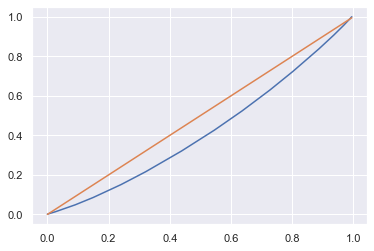

In [52]:
plt.plot(student_data_math_male['cumsum_ratio'], student_data_math_male['cumsum_G1_ratio'])
plt.plot(student_data_math_male['cumsum_ratio'], student_data_math_male['cumsum_ratio'])

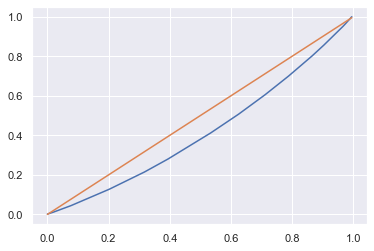

In [53]:
plt.plot(student_data_math_female['cumsum_ratio'], student_data_math_female['cumsum_G1_ratio'])
plt.plot(student_data_math_female['cumsum_ratio'], student_data_math_female['cumsum_ratio'])

In [131]:
def calc_gini(data):
    gini = 0
    triangle_sq = 0.5
    curve_sq = 0
    delta = 1/len(data)
    current = data['cumsum_G1_ratio']
    shifted = data['cumsum_G1_ratio'].shift(-1)
    for i in range(0, len(current)-1):
        curve_sq += ((current[i] + shifted[i]) * delta)/2
    return (triangle_sq - curve_sq) / triangle_sq
    
            

In [132]:
print(calc_gini(student_data_math_male))
print(calc_gini(student_data_math_female))

0.17198115609880282
0.17238700073127322
